# Pandas

## Loading data

In [65]:
# loading a cvs file
import pandas as pd
train = pd.read_csv("../course_how_to_win_kaggle/datasets/titanic/train.csv")

In [5]:
# show some records
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
# show categorical and ordinal features
cat_feat = ["Sex", "Cabin", "Embarked"]            # categorical features
ord_feat = ["Pclass"]                              # ordinal features 
train[cat_feat + ord_feat].head(7)

Sex Cabin Embarked  Pclass
0    male   NaN        S       3
1  female   C85        C       1
2  female   NaN        S       3
3  female  C123        S       1
4    male   NaN        S       3
5    male   NaN        Q       3
6    male   E46        S       1

## Exploratory Analysis


[source](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)

[source](https://medium.com/analytics-vidhya/quick-exploratory-data-analysis-pandas-profiling-421cd3ec5a50)

You may want to use this package: [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling)

[source](https://www.kdnuggets.com/2019/07/10-simple-hacks-speed-data-analysis-python.html)

In [114]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [115]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [116]:
train.describe(include=['object', 'bool'])

Name   Sex    Ticket Cabin Embarked
count                          891   891       891   204      889
unique                         891     2       681   147        3
top     Downton, Mr. William James  male  CA. 2343    G6        S
freq                             1   577         7     4      644

## Extracting unique values

Suppose you want to get all the possible values for a category. These are a few ways [nota: estos comandos los obtuve experimentando, algunos pueden estar mal!]

In [67]:
train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [68]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [69]:
train["Sex"].value_counts().index

Index(['male', 'female'], dtype='object')

In [72]:
train.groupby("Sex").size()

Sex
female    314
male      577
dtype: int64

In [73]:
train.groupby("Sex").size().index

Index(['female', 'male'], dtype='object', name='Sex')

## Plotting categorical data

In this section, we want to create bar plots to show the frequency of the values of each categorical feature. The methods described below are taken from this [question in stackoverflow](https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib).

### Method 1

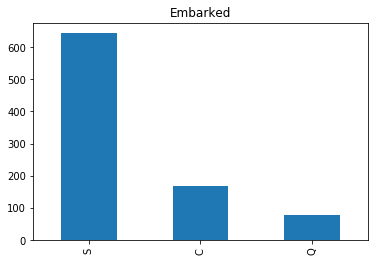

In [12]:
# simple way
train["Embarked"].value_counts().plot(kind="bar", title="Embarked");

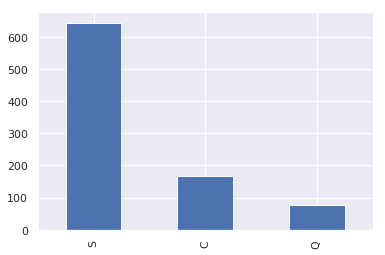

In [63]:
# similar to previous method
train["Embarked"].value_counts().plot.bar();

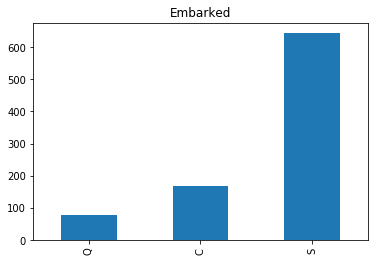

In [26]:
# define the order of the x-axis
train["Embarked"].value_counts()[['Q', 'C', 'S']].plot(kind="bar", title="Embarked");

Remember, `value_counts()` returns a `Series` object, so we can define the order of the columns.

In [23]:
type(train["Embarked"].value_counts())

pandas.core.series.Series

In [24]:
# here, we do not define the order
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
# define the order
train["Embarked"].value_counts()[['Q', 'S', 'C']]

Q     77
S    644
C    168
Name: Embarked, dtype: int64

That's why we can use `train["Embarked"].value_counts()[['Q', 'C', 'S']].plot(kind="bar", title="Embarked");` to define the order of the x-axis.

### Method 2

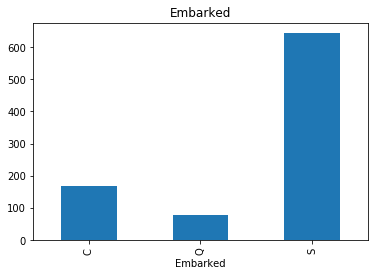

In [14]:
train.groupby("Embarked").size().plot(kind="bar", title="Embarked");

In [ ]:
# define the order of the x-axis
train.groupby("Embarked").size()[['Q', 'C', 'S']].plot(kind="bar", title="Embarked");

We can use the same trick as above to define the order of the x-axis since `.size()` returns a `Series` object:

In [28]:
type(train.groupby("Embarked").size())

pandas.core.series.Series

### Method 3: Seaborn

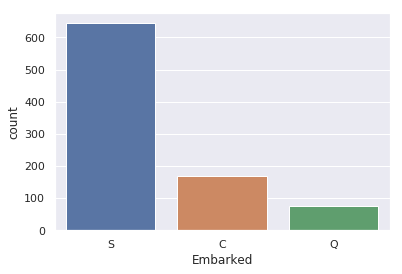

In [34]:
import seaborn as sns
sns.set()

sns.countplot(train["Embarked"]);

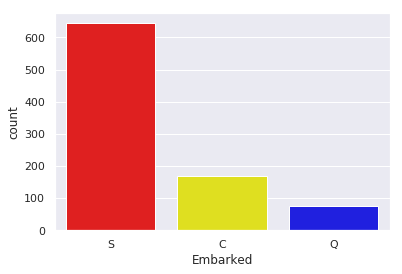

In [36]:
# define colors
sns.countplot(train["Embarked"], palette={"S": "red", "C": "yellow", "Q": "blue"});

### Method 4: Matplotlib

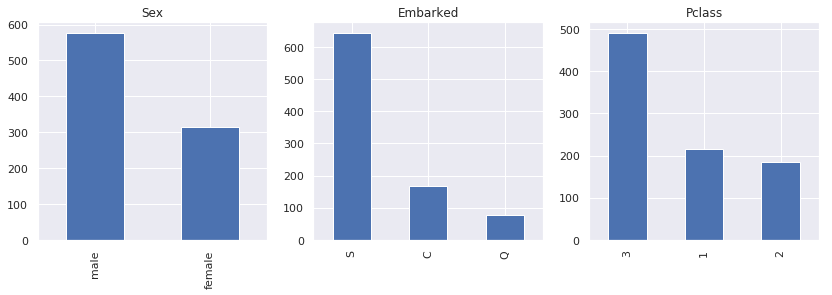

In [43]:
import matplotlib.pyplot as plt

features = ["Sex", "Embarked", "Pclass"]  # do not use 'Cabin', use a single plot for that feature

fig, ax = plt.subplots(1, len(features), figsize=(14, 4))

for feat, ax in zip(features, ax.flat):
    train[feat].value_counts().plot(kind="bar", title=feat, ax=ax)

### Method 5: Proportions

Suppose you want to know the proportions of each categorical feature. You can use the following method described in [this post](https://www.kaggle.com/residentmario/univariate-plotting-with-pandas).

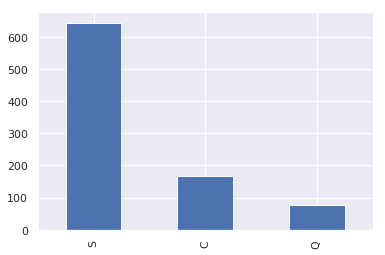

In [65]:
train["Embarked"].value_counts().plot(kind="bar");

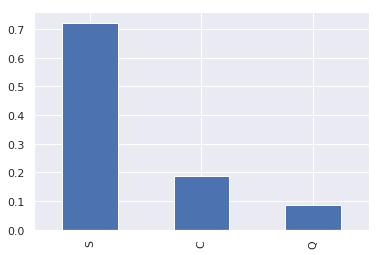

In [66]:
(train["Embarked"].value_counts() / len(train) ).plot(kind="bar");

**Note** You should be careful when using this method. Maybe there are some NaN values that you need to take care of before using `len(train)`. For instance, the total number of records in `train` may not be the same as the number of non-NaN records in `train["Embarked"]`:

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [70]:
print("# of records in train:", len(train))
print("# of records in train['Embarked']:", len(train["Embarked"]))

# of records in train: 891
# of records in train['Embarked']: 891


In [72]:
train["Embarked"].value_counts().sum()   # it is 889, not 891

889

Note that there are two missing values in `train["Embarked"]`.

In [77]:
# there are two NaN values
train["Embarked"].isna().sum()

2

In [78]:
to_keep = train["Embarked"].isna()
train["Embarked"][to_keep]

61     NaN
829    NaN
Name: Embarked, dtype: object

Given this, I think a better approach to compute the proportions of the values of a categorical feature is as follows:

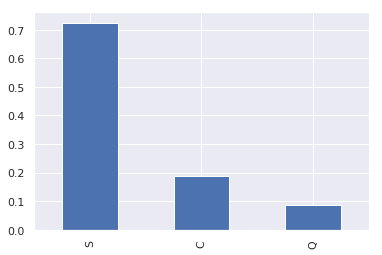

In [81]:
n_records = train["Embarked"].value_counts().sum()
(train["Embarked"].value_counts() / n_records ).plot(kind="bar");

Finally, you can use that trick to show the proportions of multiple categorical features:

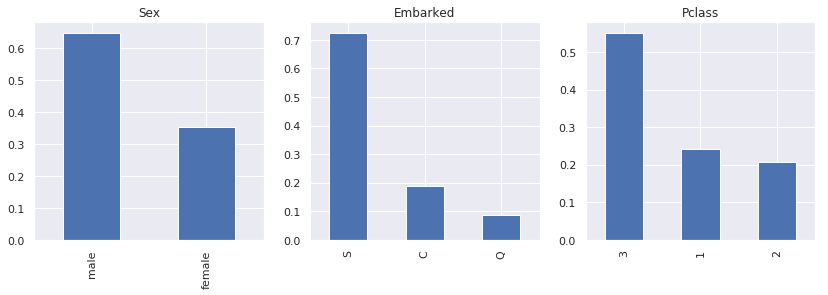

In [84]:
import matplotlib.pyplot as plt

features = ["Sex", "Embarked", "Pclass"]  # do not use 'Cabin', use a single plot for that feature

fig, ax = plt.subplots(1, len(features), figsize=(14, 4))

for feat, ax in zip(features, ax.flat):
    
    n_records = train[feat].value_counts().sum()
    (train[feat].value_counts() / n_records ).plot(kind="bar", title=feat, ax=ax);

### Method 6: Ploting a categorical feature with a lot of values

We mentioned above that the `Cabin` feature needs an independent plot. This is becasue it has a lot of values, making it hard to visualize them in a subplot. Actually, we cannot use a bar plot since the resulting plot is barely interpretable.

In [86]:
train["Cabin"].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
C22 C26        3
D              3
F2             3
F33            3
C93            2
E24            2
B5             2
C92            2
D20            2
B35            2
D36            2
D17            2
C123           2
B58 B60        2
C124           2
E8             2
B51 B53 B55    2
F4             2
B77            2
C126           2
F G73          2
C65            2
E25            2
E121           2
B22            2
B20            2
              ..
E36            1
A26            1
C49            1
D46            1
C86            1
C62 C64        1
C45            1
E34            1
D19            1
D30            1
B38            1
B78            1
B41            1
B102           1
F G63          1
C46            1
D45            1
B50            1
D15            1
E63            1
C110           1
D9             1
B37            1
C91            1
C148           1
C32            1
C50            1
B39           

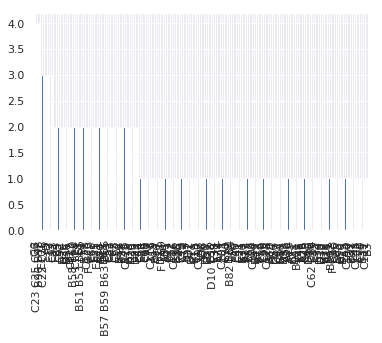

In [89]:
train["Cabin"].value_counts().plot.bar();

Instead, we can use a line plot as shown below:

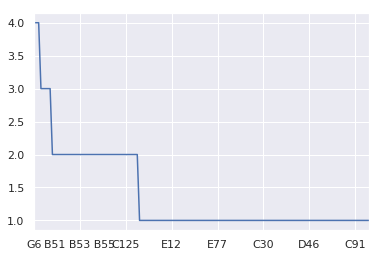

In [90]:
train["Cabin"].value_counts().plot.line();

**Note** An important note from [this post](https://www.kaggle.com/residentmario/univariate-plotting-with-pandas):


> A line chart can pass over any number of many individual values, making it the tool of first choice for distributions with many unique values or categories.
> 
> However, line charts have an important weakness: unlike bar charts, they're not appropriate for nominal categorical data (e.g., the `Cabin` feature). While bar charts distinguish between every "type" of point, line charts mushes them together. So a line chart asserts an order to the values on the horizontal axis, and the order won’t make sense with some data. After all, a "descent" from California to Washington to Tuscany doesn't mean much!
> 
> Line charts also make it harder to distinguish between individual values.
> 
> In general, if your data can fit into a bar chart, just use a bar chart!



### Customization

I got this idea from [this post](https://mode.com/example-gallery/python_histogram/).

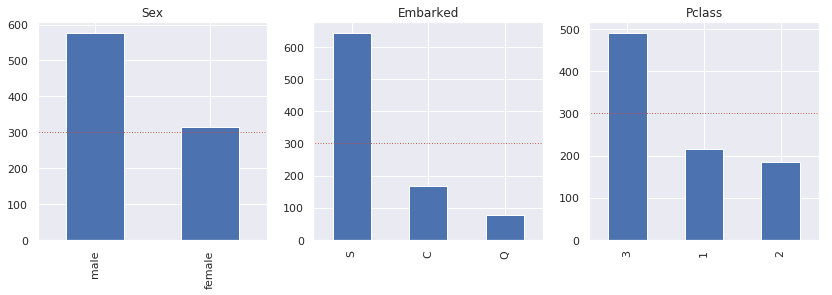

In [57]:
import matplotlib.pyplot as plt

features = ["Sex", "Embarked", "Pclass"]  # do not use 'Cabin', use a single plot for that feature

fig, ax = plt.subplots(1, len(features), figsize=(14, 4))

for feat, ax in zip(features, ax.flat):
    # create bar plot
    train[feat].value_counts().plot(kind="bar", title=feat, ax=ax)
    
    # customize plot
    ax.plot([-1, 3], [300, 300], 'r', lw=1, ls=":")  # draw a hypothetical threshold at y=300

### Methods that did not work

In [47]:
# this takes a lot of time, I do not know if that works 
# Maybe it only works with numeric (continuous) data, not categorical data
# https://www.kaggle.com/residentmario/univariate-plotting-with-pandas
train[features].plot.bar();

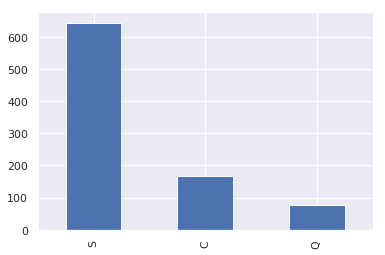

In [62]:
train["Embarked"].value_counts().plot.bar();

## Plotting continuous data

I took some ideas from [this post](https://www.kaggle.com/residentmario/univariate-plotting-with-pandas).

## Sorting

Suppose you want to get the categories of `Cabin` with the largest frequency [(source)](https://www.geeksforgeeks.org/pandas-groupby-sort-within-groups/):

In [113]:
train["Cabin"].value_counts()[:5]

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
C22 C26        3
Name: Cabin, dtype: int64

In [108]:
# https://www.geeksforgeeks.org/pandas-groupby-sort-within-groups/
train.groupby("Cabin").size().nlargest()

Cabin
B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
D              3
dtype: int64

In [107]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html
train["Cabin"].value_counts().sort_values(ascending=False)[:5]

G6             4
C23 C25 C27    4
B96 B98        4
D              3
F2             3
Name: Cabin, dtype: int64

Although the results are similar, the output of each method is slightly different:

In [110]:
t = train.groupby("Cabin").size().nlargest()
print(type(t))
print(t.index)
print(t.name)

<class 'pandas.core.series.Series'>
Index(['B96 B98', 'C23 C25 C27', 'G6', 'C22 C26', 'D'], dtype='object', name='Cabin')
None


In [111]:
t = train["Cabin"].value_counts().sort_values(ascending=False)[:5]
print(type(t))
print(t.index)
print(t.name)

<class 'pandas.core.series.Series'>
Index(['G6', 'C23 C25 C27', 'B96 B98', 'D', 'F2'], dtype='object')
Cabin


## Encoding features

In [124]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit([1,2,2,6])

le.classes_                     # array([1, 2, 6])
le.transform([1,1,2,6])         # array([0, 0, 1, 2])
le.inverse_transform([0,0,1,2]) # array([1, 1, 2, 6])

array([1, 1, 2, 6])

In [129]:
le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

list(le.classes_)                          # ['amsterdam', 'paris', 'tokyo']
le.transform(["tokyo", "tokyo", "paris"])  # array([2, 2, 1])
list(le.inverse_transform([2, 2, 1]))      # ['tokyo', 'tokyo', 'paris']

['tokyo', 'tokyo', 'paris']

In [130]:
le.inverse_transform([2,2,1])

array(['tokyo', 'tokyo', 'paris'], dtype='<U9')

Let's encode the `Embarked` feature.

In [152]:
# first, remove NaN values
column = train["Embarked"][~train["Embarked"].isna()]

# then, fit the data
le = LabelEncoder()
le.fit(column)

# finally, encode the data
data = le.transform(column)
data[:10]   # show some examples

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0])

In [155]:
le.inverse_transform(data[:10])

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C'], dtype=object)

In [156]:
le.classes_

array(['C', 'Q', 'S'], dtype=object)

The mapping is as follows:
- `0` -> `'C'`
- `1` -> `'Q'`
- `2` -> `'S'`

In [ ]:
You can also use `df.dropna()` to remove NaN values:

In [174]:
column = train["Embarked"].dropna()

le = LabelEncoder()
data = le.fit_transform(column)
data[:10]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0])

In [175]:
le.classes_

array(['C', 'Q', 'S'], dtype=object)

We got the same result as above.

**Note** `LabelEncoder` will not work if there are NaN values:

In [154]:
lee = LabelEncoder()
lee.fit(train["Embarked"])  # this will cause an error

There are other ways to encode values [source](https://stackoverflow.com/questions/50258960/how-to-apply-labelencoder-for-a-specific-column-in-pandas-dataframe):


```python
le = preprocessing.LabelEncoder()
df['label'] = le.fit_transform(df.label.values)
```

or

```python
df['label'] = le.fit_transform(df['label'])
```

In [ ]:
There are two categorical features with no NaN values:

In [157]:
train["Sex"].isna().sum()

0

In [158]:
train["Pclass"].isna().sum()

0

Let's encode `Pclass`:

In [161]:
le = LabelEncoder()
le.fit(train["Pclass"])   # or le.fit(train["Pclass"].values)
le.classes_  

array([1, 2, 3])

In [162]:
le = LabelEncoder()
le.fit(train["Pclass"].values)
le.classes_

array([1, 2, 3])

Now, transform the data:

In [164]:
data = le.transform(train["Pclass"].values)
data[:10]

array([2, 0, 2, 0, 2, 2, 0, 2, 2, 1])

In [165]:
le.inverse_transform(data[:10])

array([3, 1, 3, 1, 3, 3, 1, 3, 3, 2])

In [166]:
train["Pclass"][:10]

0    3
1    1
2    3
3    1
4    3
5    3
6    1
7    3
8    3
9    2
Name: Pclass, dtype: int64

Now, encode `Sex`:

In [168]:
le = LabelEncoder()
data = le.fit_transform(train["Sex"])
data[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [169]:
le.classes_   # note that the classes are sorted

array(['female', 'male'], dtype=object)

In [170]:
le.inverse_transform(data[:10])

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female'], dtype=object)

In [171]:
train["Sex"][:10]

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: Sex, dtype: object

In [ ]:
As it can be seen, the mapping is correct.

## DataFrames

In [12]:
df = pd.DataFrame([
            ('bird', 'Falconiformes', 389.0),
            ('bird', 'Psittaciformes', 24.0),
            ('mammal', 'Carnivora', 80.2),
            ('mammal', 'Primates', np.nan),
            ('mammal', 'Carnivora', 58)],
            index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
            columns=('class', 'order', 'max_speed'))
df

class           order  max_speed
falcon     bird   Falconiformes      389.0
parrot     bird  Psittaciformes       24.0
lion     mammal       Carnivora       80.2
monkey   mammal        Primates        NaN
leopard  mammal       Carnivora       58.0

nota: parece que puedes repetir elementos en `index` (ie, no son unique):

In [13]:
df = pd.DataFrame([
            ('bird', 'Falconiformes', 389.0),
            ('bird', 'Psittaciformes', 24.0),
            ('mammal', 'Carnivora', 80.2),
            ('mammal', 'Primates', np.nan),
            ('mammal', 'Carnivora', 58)],
            index=['falcon', 'falcon', 'falcon', 'falcon', 'falcon'],
            columns=('class', 'order', 'max_speed'))
df

class           order  max_speed
falcon    bird   Falconiformes      389.0
falcon    bird  Psittaciformes       24.0
falcon  mammal       Carnivora       80.2
falcon  mammal        Primates        NaN
falcon  mammal       Carnivora       58.0

ojo! .count() no es lo mismo que .size() segun este post!

https://realpython.com/pandas-groupby/
    
Note: In df.groupby(["state", "gender"])["last_name"].count(), you could also use .size() instead of .count(), since you know that there are no NaN last names. Using .count() excludes NaN values, while .size() includes everything, NaN or not.

## Group by


[pandas docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

[pandas cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook-grouping)

[realpython](https://realpython.com/pandas-groupby/)

[stackoverflow](https://stackoverflow.com/questions/50841829/sum-product-and-groupby)

In [1]:
import pandas as pd

# housekeeping
pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 25)

In [2]:
# read first dataset
dtypes = {
    "first_name": "category",
    "gender": "category",
    "type": "category",
    "state": "category",
    "party": "category",
}

df = pd.read_csv("legislators-historical.csv",
                dtype=dtypes,
                usecols=list(dtypes) + ["birthday", "last_name"],
                parse_dates=["birthday"])
df.head()

last_name  first_name   birthday gender type state                party
0   Bassett     Richard 1745-04-02      M  sen    DE  Anti-Administration
1     Bland  Theodorick 1742-03-21      M  rep    VA                  NaN
2     Burke     Aedanus 1743-06-16      M  rep    SC                  NaN
3   Carroll      Daniel 1730-07-22      M  rep    MD                  NaN
4    Clymer      George 1739-03-16      M  rep    PA                  NaN

In [36]:
df.dtypes

last_name             object
first_name          category
birthday      datetime64[ns]
gender              category
type                category
state               category
party               category
dtype: object

What is the count of Congressional members, on a state-by-state basis, over the entire history of the dataset? In SQL, you could find this answer with a SELECT statement:

```sql
SELECT state, count(name)
FROM df
GROUP BY state
ORDER BY state;
```

n_by_state = df.groupby("state")["last_name"].count()
n_by_state.head(10)

You call `.groupby()` and pass the name of the column you want to group on, which is `"state"`. Then, you use `["last_name"]` to specify the columns on which you want to perform the actual aggregation.

In [80]:
n_by_state_gender = df.groupby(["state", "gender"])["last_name"].count()
n_by_state_gender

state  gender
AK     M          16
AL     F           3
       M         203
AR     F           5
       M         112
AS     M           2
AZ     F           3
       M          45
CA     F          24
       M         339
CO     F           3
       M          87
                ... 
VA     F           4
       M         428
VI     F           1
       M           3
VT     M         115
WA     F           5
       M          90
WI     M         197
WV     F           1
       M         119
WY     F           2
       M          38
Name: last_name, Length: 104, dtype: int64

In [81]:
n_by_state_gender.index[:5]

MultiIndex(levels=[['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'DK', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OL', 'OR', 'PA', 'PI', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'], ['F', 'M']],
           codes=[[0, 1, 1, 2, 2], [1, 0, 1, 0, 1]],
           names=['state', 'gender'])

In [84]:
df.groupby(["state", "gender"])["last_name"].count()

state  gender
AK     M          16
AL     F           3
       M         203
AR     F           5
       M         112
AS     M           2
AZ     F           3
       M          45
CA     F          24
       M         339
CO     F           3
       M          87
                ... 
VA     F           4
       M         428
VI     F           1
       M           3
VT     M         115
WA     F           5
       M          90
WI     M         197
WV     F           1
       M         119
WY     F           2
       M          38
Name: last_name, Length: 104, dtype: int64

In [86]:
df.groupby(["state", "gender"])["party"].count()  # porque no da lo mismo que con 'last_name'

state  gender
AK     M          14
AL     F           3
       M         203
AR     F           5
       M         110
AS     M           2
AZ     F           3
       M          45
CA     F          24
       M         339
CO     F           3
       M          87
                ... 
VA     F           4
       M         414
VI     F           1
       M           3
VT     M         111
WA     F           5
       M          90
WI     M         197
WV     F           1
       M         119
WY     F           2
       M          38
Name: party, Length: 104, dtype: int64

In [57]:
cols = list(dtypes) + ["birthday", "last_name"] 
for col in cols:
    print(len(df[col].value_counts()))
    print()

58

2

59

2

1541

10544

5468



In [62]:
df.groupby("gender").size()

gender
F      235
M    11748
dtype: int64

In [63]:
df["gender"].unique()

[M, F]
Categories (2, object): [M, F]

In [64]:
df["gender"].value_counts()

M    11748
F      235
Name: gender, dtype: int64

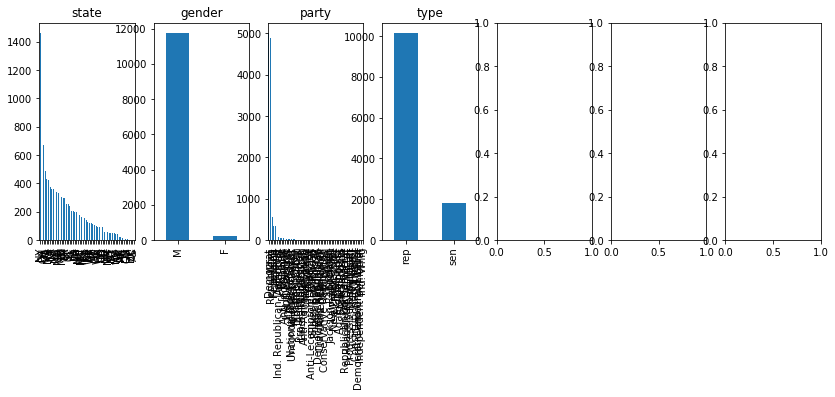

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, len(cols), figsize=(14, 4))

for col, ax in zip(cols[:4], ax.flat):
    df[col].value_counts().plot(kind="bar", title=col, ax=ax)

In [ ]:
import pandas as

In [14]:
df = pd.DataFrame([
            ('bird', 'Falconiformes', 389.0),
            ('bird', 'Psittaciformes', 24.0),
            ('mammal', 'Carnivora', 80.2),
            ('mammal', 'Primates', np.nan),
            ('mammal', 'Carnivora', 58)],
            index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
            columns=('class', 'order', 'max_speed'))
df

class           order  max_speed
falcon     bird   Falconiformes      389.0
parrot     bird  Psittaciformes       24.0
lion     mammal       Carnivora       80.2
monkey   mammal        Primates        NaN
leopard  mammal       Carnivora       58.0

In [19]:
# the following lines shows how to create a GroupBy object
# dont confuse it with DataFrame
grouped = df.groupby("class")
grouped = df.groupby("order", axis="columns")
grouped = df.groupby(["class", "order"])

In [21]:
np.random.seed(42)
df = pd.DataFrame({
                    'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                            'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
df

A      B         C         D
0  foo    one  0.496714 -0.469474
1  bar    one -0.138264  0.542560
2  foo    two  0.647689 -0.463418
3  bar  three  1.523030 -0.465730
4  foo    two -0.234153  0.241962
5  bar    two -0.234137 -1.913280
6  foo    one  1.579213 -1.724918
7  foo  three  0.767435 -0.562288

In [18]:
grouped = df.groupby(["class", "order"])

In [3]:
import pandas as pd


import numpy as np

data_dict = {
            "shop_id": [1,1,1,2,2],
            "item_cost": [10.0, 20.0, 30.0, 40.0, 50.0],
            "quantity": [1,2,3,4,5]}

data = pd.DataFrame(data_dict)
data

item_cost  quantity  shop_id
0       10.0         1        1
1       20.0         2        1
2       30.0         3        1
3       40.0         4        2
4       50.0         5        2

In [8]:
data.groupby("shop_id")[["item_cost"]].size()

shop_id
1    3
2    2
dtype: int64

---

Let's look at the learning curves of the plain Linear Regression model. First, let's look at the performance on the training data (**red line**): when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes imposible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn't make the average error (i.e., RMSE) much better or worse.

Now, let's look at the performance of the model in the validation data. Whe the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is hown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

These learining curves are typical of an underfitting model. Both curves have reached a plateau; they are clode and fairly high.

**If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.**

[Geron] p. 128
